# Scikit-learn (sklearn) logistic regression tutorial

In this tutorial, we will look at classification models in sklearn.

## Logistic regression

We first demonstrate the use of the logistic regression algorithm on the digits dataset.

#### Load the dataset

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

#### Create train and test splits

In [90]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.25)

In [91]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


### Build a logistic regression model

In this dataset there are 10 classes. We can fit a binary logistic regression classifier for each label separately.

The following is an example where we train a logistic regression classifier to discriminate between the digit 1, and any of the other classes.

In [92]:
import numpy as np
d = 1
train_where_d = np.where(ytrain==d)[0]
test_where_d = np.where(ytest==d)[0]

ytrain_d = np.zeros((len(ytrain),), dtype=np.int32)
ytrain_d[train_where_d] = 1

ytest_d = np.zeros((len(ytest),), dtype=np.int32)
ytest_d[test_where_d] = 1

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(Xtrain, ytrain_d)
ypred = log_reg.predict(Xtest)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_d, ypred)

0.9822222222222222

#### Compute models and evaluate separately for each class.

In [97]:
for d in range(10):
    train_where_d = np.where(ytrain==d)[0]
    test_where_d = np.where(ytest==d)[0]

    ytrain_d = np.zeros((len(ytrain),), dtype=np.int32)
    ytrain_d[train_where_d] = 1

    ytest_d = np.zeros((len(ytest),), dtype=np.int32)
    ytest_d[test_where_d] = 1
    
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    log_reg.fit(Xtrain, ytrain_d)
    ypred = log_reg.predict(Xtest)
    
    print(f'Accuracy score for identifying digit {d}: {100 * accuracy_score(ytest_d, ypred):.2f}%')

Accuracy score for identifying digit 0: 100.00%
Accuracy score for identifying digit 1: 98.22%
Accuracy score for identifying digit 2: 100.00%
Accuracy score for identifying digit 3: 98.44%
Accuracy score for identifying digit 4: 99.78%
Accuracy score for identifying digit 5: 98.67%
Accuracy score for identifying digit 6: 99.78%
Accuracy score for identifying digit 7: 99.56%
Accuracy score for identifying digit 8: 94.89%
Accuracy score for identifying digit 9: 97.33%


The `LogisticRegression` model can also fit all binary classifiers at once.

In [98]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
log_reg.fit(Xtrain, ytrain)
ypred = log_reg.predict(Xtest)

In [99]:
accuracy_score(ytest, ypred)

0.9777777777777777

### Confusion matrix

The accuracy computed above doesn't say where the models have gone wrong - the confusion matrix is a nice way to see what the errors are that the model is typically making.

The columns of the matrix are the predicted classes, whereas the rows are the actual classes.

In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  2  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  1  0  0  0  0]
 [ 0  0  0  0 49  0  0  0  0  1]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  1 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  1  0  0  0  0 47  0]
 [ 1  0  0  1  0  0  0  0  0 44]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


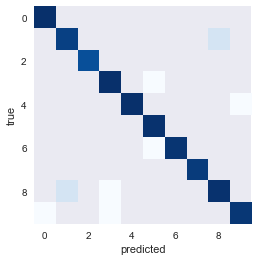

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');
plt.style.use('seaborn')
plt.show()

We can look at some examples of digits are their predictions. Incorrect labels are shown in red.

Re-run the following cell to randomly sample from the test set.

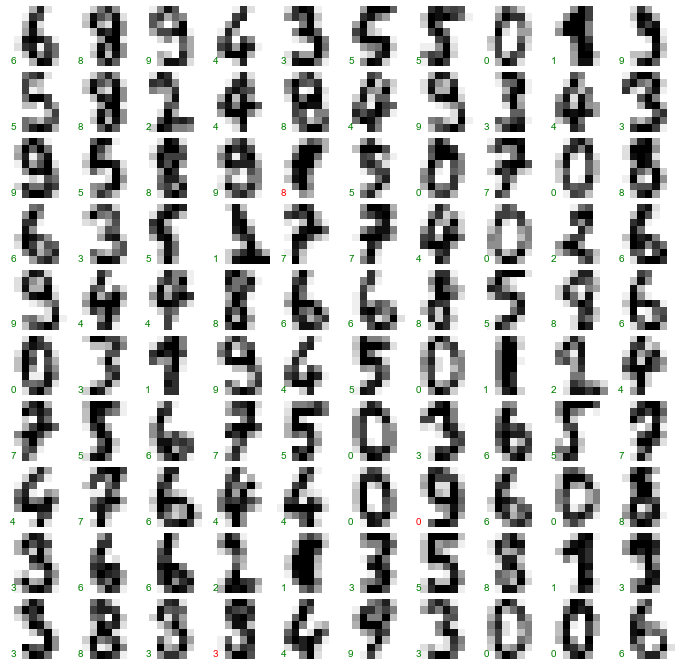

In [108]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    n = np.random.choice(np.arange(Xtest.shape[0]))
    ax.imshow(Xtest[n].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[n]),
            transform=ax.transAxes,
            color='green' if (ytest[n] == ypred[n]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])